In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import math
from matplotlib.patches import Circle


plt.rcParams['font.family'] = 'sans-serif'


# Data

In [3]:
## Define box size
N = 300
rho_star = 0.25
L  =(np.sqrt(N/(rho_star)))

In [4]:
### Open data and set numpy arrays
prefix = "/Users/leo/C++/Outputs/300_R5_1.0T"
with open(prefix + '_trajectory.bin', 'rb') as f:
    data = np.fromfile(f, dtype=np.float64)
data = data.reshape((int)(1000/10/0.001), 4*900)
data.shape
x = data[:,0:3*N]
y = data[:, 3*N:2*3*N]
vx = data[:, 2*3*N:3*3*N]
vy = data[:, 3*3*N:]

# with open(prefix +'_xtraj.txt', 'r') as file: 
#     x = [float(line.rstrip()) for line in file]
# with open(prefix +'_ytraj.txt', 'r') as file: 
#     y = [float(line.rstrip()) for line in file]
# with open(prefix +'_ytraj.txt', 'r') as file: 
#     vx = [float(line.rstrip()) for line in file]
# with open(prefix +'_xtraj.txt', 'r') as file: 
#     vy = [float(line.rstrip()) for line in file]

with open(prefix +'_KE.txt', 'r') as file: 
    KE = [float(line.rstrip()) for line in file]
with open(prefix +'_PE.txt', 'r') as file: 
    PE = [float(line.rstrip()) for line in file]

x = np.array(x)
y = np.array(y)
vx = np.array(vx)
vy = np.array(vy)
KE = np.array(KE)
PE = np.array(PE)

x.shape

x = x.reshape((int)(x.size/(3*N)), 3*N)
y = y.reshape((int)(x.size/(3*N)), 3*N)
vx = vx.reshape((int)(x.size/(3*N)), 3*N)
vy = vy.reshape((int)(x.size/(3*N)), 3*N)

s = np.min([x.size, y.size, vx.size, vy.size])
len = (int)(np.floor(s/(3*N))*3*N)
x = x[0:len].reshape((int)(len/3/N), (3*N))
y = y[0:len].reshape((int)(len/3/N), (3*N))
vx = vx[0:len].reshape((int)(len/3/N), (3*N))
vy = vy[0:len].reshape((int)(len/3/N), (3*N))


In [4]:
## COMPUTE TEMPERATURE (instantaneous)

T = KE*2/3/N #3/2 KE/N = T*, KE of each 

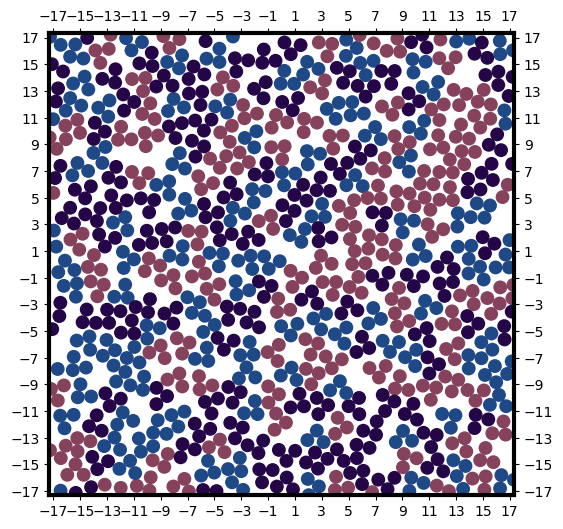

In [5]:
### Visualize one state

def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(-1) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])


L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 1
ss = 80

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)
# plt.scatter(x0, y0+L, color = indices, s = ss, alpha = alph)
# plt.scatter(x00, y00+L, color = indices, s = ss, alpha = alph)
# plt.scatter(x000, y000+L, color = indices, s = ss, alpha = alph)

plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

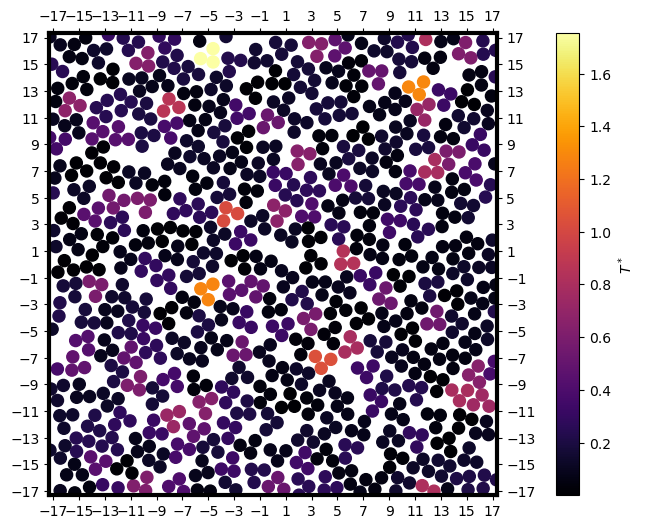

In [349]:
## Temperature cmap state 

vx_COM = (vx0 + vx00 + vx000)/3
vy_COM = (vy0 + vy00 + vy000)/3
speed_COM = np.sqrt(vx_COM**2 + vy_COM**2)
temp_COM = (vx_COM**2 + vy_COM**2)/2*2/3

norm = mcolors.Normalize(vmin = temp_COM.min(), vmax = temp_COM.max())
cmap = cm.inferno
colors = cmap(norm(temp_COM))

ss = 75 ### 75 for N=N, 110 for N=200
alph = 1.0

plt.figure(figsize = (7.7,6))
plt.scatter(x0, y0, color = colors, s = ss, alpha = alph)
plt.scatter(x00, y00, color = colors, s = ss, alpha = alph)
plt.scatter(x000, y000, color = colors, s = ss, alpha = alph)




plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


# --- everything above unchanged ---
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

sm = cm.ScalarMappable(norm=norm, cmap=cmap) 
sm.set_array([])                              
cbar = plt.colorbar(sm, ax=ax, pad=0.1)      
# cbar.set_label(r"$|v_{COM}|/\sqrt{\epsilon/m}$") ## Speed Label
cbar.set_label(r"$T^*$")


plt.show()

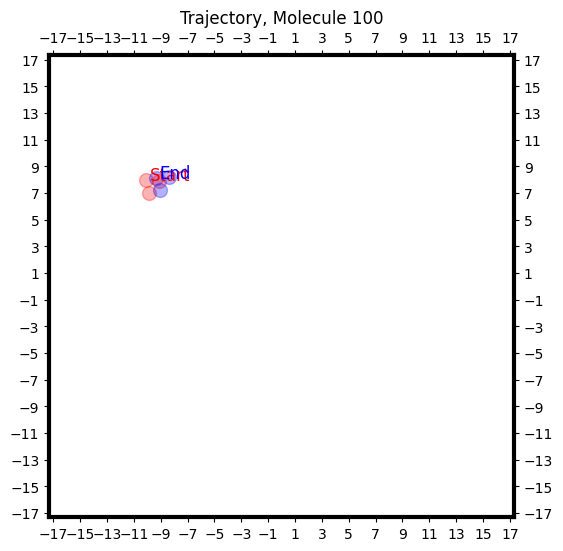

In [826]:
##Single Particle trajectory 

plt.figure(figsize=(6, 6))

magnitude = np.sqrt(xt**2 + yt**2)
u = vxt
v = vyt

n = 100### molecule tracked

plt.scatter(x[:,n], y[:,n], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n], y[0,n], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n], y[-1,n], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+N], y[:,n+N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+N], y[0,n+N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+N], y[-1,n+N], s = 100, color = 'b', alpha = 0.3)
plt.scatter(x[:,n+2*N], y[:,n+2*N], s = 5, color = 'k', alpha = 0.002)
plt.scatter(x[0,n+2*N], y[0,n+2*N], s = 100, color = 'r', alpha = 0.3)
plt.scatter(x[-1,n+2*N], y[-1,n+2*N], s = 100, color = 'b', alpha = 0.3)

plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.text(x[0,n]+0.3, y[0,n], "Start", color = 'red', fontsize = 12)
plt.text(x[-1,n]+0.3, y[-1,n], "End", color = 'blue', fontsize = 12)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.title(f"Trajectory, Molecule {n}")

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))

plt.show()

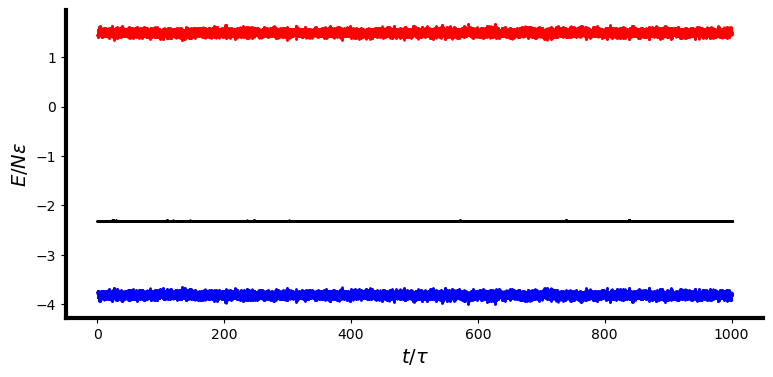

In [ ]:
##Kinetic and Potential Energies 

tlim = 10000 ##plot 0 to this time in \tau
tlimsteps =(int) (tlim/0.01)
plt.figure(figsize = (9, 4))
time = np.linspace(0,tlim, (int)(tlim/0.01))
### Modify for density of energy computations
# time1 = np.linspace(0, 0.1, 100)
# time2 = np.linspace(0.1, 100, KE.size - 100)
# time = np.append(time1, time2)
# time = np.arange(0,tlim, 0.01)
plt.scatter(time, KE[0:tlimsteps]/(N), color = 'r',  s = 0.5)
plt.scatter(time, PE[0:tlimsteps]/N, color = 'b', s = 0.5)
plt.scatter(time, (PE[0:tlimsteps] + KE[0:tlimsteps])/N, color = 'k', s = 0.5)

# plt.xscale('log')
# plt.text(125, 8, "Kinetic energy", color = 'red')
# plt.text(125, 7, "Total energy", color = 'black')
# plt.text(125, 6, "Potential energy", color = 'blue')
# plt.text(15, 2, f"N = {N}, $\\rho^* = {rho_star}$", fontsize =12)

plt.xlabel("$t/\\tau$", fontsize = 14)
plt.ylabel("$E/N\\epsilon$", fontsize = 14)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)

# plt.xlim(1745, 1750)
plt.show()


In [41]:
np.std(KE[14000:15000]/N + PE[14000:15000]/N)/np.mean(KE[14000:15000]/N + PE[14000:15000]/N)

np.float64(-0.0004813843917299906)

# Radial Distribution Function

In [66]:
def periodic(sep):
    return np.where(sep > L / 2, sep - L,
           np.where(sep < -L / 2, sep + L, sep))


In [67]:
x1 = (np.array(x[:,0:N])+(L/2))*(2*np.pi)/L
x2 = (np.array(x[:,N:2*N])+(L/2))*(2*np.pi)/L
x3 = (np.array(x[:,2*N:3*N])+(L/2))*(2*np.pi)/L
y1 = (np.array(y[:,0:N])+(L/2))*(2*np.pi)/L
y2 = (np.array(y[:,N:2*N])+(L/2))*(2*np.pi)/L
y3 = (np.array(y[:,2*N:3*N])+(L/2))*(2*np.pi)/L

z_x = np.angle((np.exp(1j*x1) + np.exp(1j*x2) + np.exp(1j*x3))/3)
z_y = np.angle((np.exp(1j*y1) + np.exp(1j*y2) + np.exp(1j*y3))/3)

x_COM = (z_x*L/(2*np.pi))%L - (L/2)
y_COM = (z_y*L/(2*np.pi))%L - (L/2)


In [358]:
## Compute g(r) with COM
gr_x = x_COM
gr_y = y_COM

def compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, t_start, t_end):
    T_range = t_end - t_start
    N = gr_x.shape[1]
    num_bins = int(np.ceil(hk_lim / dr))
    h_total = np.zeros(num_bins)

    for t in range(t_start, t_end-1):
        x = gr_x[t]
        y = gr_y[t]

        dx = periodic(x[:, np.newaxis] - x[np.newaxis, :])
        dy = periodic(y[:, np.newaxis] - y[np.newaxis, :])

        i, j = np.triu_indices(N, k=1)

        r_ij = np.sqrt(dx[i, j]**2 + dy[i, j]**2)
        r_ij = r_ij[r_ij < hk_lim]  # cutoff

        k = np.floor(r_ij / dr).astype(int)
        np.add.at(h_total, k, 2)  

    h_avg = h_total / T_range

    r_vals = dr * (np.arange(num_bins) + 0.5)
    n_id = np.pi * rho_star * ((r_vals + dr)**2 - (r_vals)**2)

    g_r = h_avg / (n_id * N)

    return r_vals, g_r


In [361]:
gr_x.size/100000

300.0

In [362]:
t_start = 0 ## beginning of time average (in timesteps)
t_end = 100000 ## end of time average (in timesteps)
hk_lim = L / 2 ## cutoff
dr = 0.05 ## bin size
r_vals, g_r = compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, t_start, t_end)

In [363]:
## Compute Temperautre 
T_ens = np.mean(KE[t_start:t_end]/N*2/3)

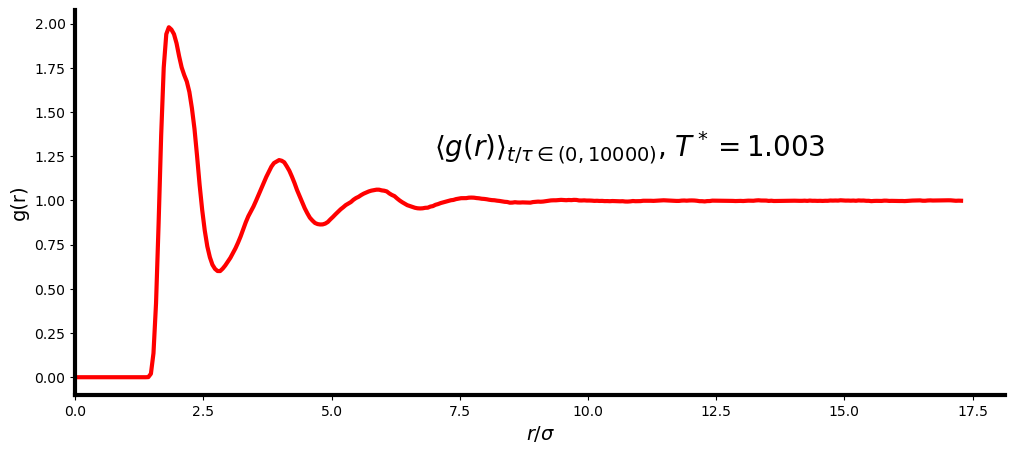

In [377]:
plt.figure(figsize = (12, 5))
# plt.scatter(r_vals[0:g_r.size -1], g_r[0:g_r.size -1], color = 'r', s = 3) ## scatter
plt.plot(r_vals[0:g_r.size -1], g_r[0:g_r.size -1], color = 'red', lw = 3) ## plot

plt.xlabel('$r/\\sigma$', fontsize = 14)
plt.ylabel('g(r)', fontsize = 14)
plt.text(7.0, 1.25, fr"$\langle g(r)\rangle_{{t/\tau \in ({t_start/10:.0f}, {t_end/10:.0f})}}$, $T^* = {T_ens:.3f}$", fontsize=20)

ax = plt.gca()

plt.xlim(0,)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

In [365]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(g_r, height=1.0) 
def gaussian(x, amp, center, sigma, offset):
    return amp * np.exp(-(x - center)**2 / (2 * sigma**2)) + offset

print("Detected peak fits:", r_vals[peaks])
print(peaks)


Detected peak fits: [ 1.825  3.975  5.875  7.725  9.475  9.625  9.725  9.925 11.475 13.325
 14.925 16.475 16.675 16.875 17.025]
[ 36  79 117 154 189 192 194 198 229 266 298 329 333 337 340]


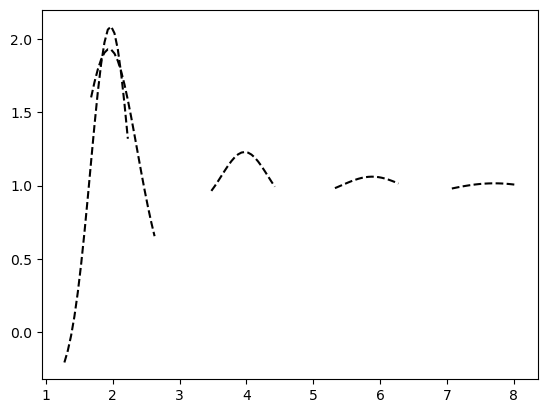

In [366]:
## Manual gaussian finding
popt_list = []

for peak in [35, 43, 79, 116, 151]:
    window = 10
    start = max(peak - window, 0)
    end = min(peak + window, r_vals.size)

    x_data = r_vals[start:end]
    y_data = g_r[start:end]

    init_guess = [max(y_data)-min(y_data), r_vals[peak], 0.2, min(y_data)]
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=init_guess)
    popt_list.append(popt)
    plt.plot(x_data, gaussian(x_data, *popt), 'k--')
    
popt_list = np.array(popt_list)
popt_list = popt_list[popt_list[:, 1] < 7.5]

In [421]:
peaks = [35, 43, 79, 116, 151]

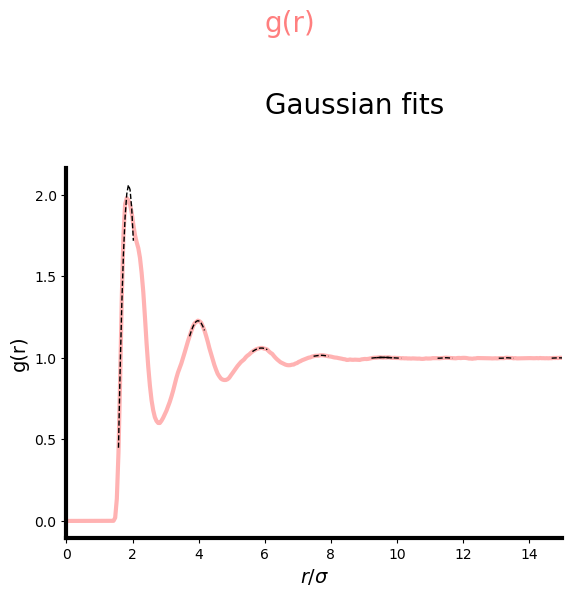

In [367]:
## Automatic gaussian finding

from scipy.optimize import curve_fit

popt_list = []
plt.plot(r_vals[0:g_r.size -1], g_r[0:g_r.size -1], color = 'red', lw = 3, alpha = 0.3) ## plot
for peak in peaks:
    window = 5
    start = max(peak - window, 0)
    end = min(peak + window, r_vals.size)

    x_data = r_vals[start:end]
    y_data = g_r[start:end]

    init_guess = [max(y_data)-min(y_data), r_vals[peak], 0.2, min(y_data)]
    popt, pcov = curve_fit(gaussian, x_data, y_data, p0=init_guess)
    popt_list.append(popt)
    plt.plot(x_data, gaussian(x_data, *popt), 'k--', linewidth = 1)
popt_list = np.array(popt_list)
plt.xlim(0,15)
popt_list = popt_list[popt_list[:, 1] < 7.5]
plt.xlim(0,)

plt.xlabel("$r/\\sigma$", fontsize = 14)
plt.ylabel("g(r)", fontsize = 14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(6, 3.0, "g(r)", color = 'red', fontsize = 20, alpha = 0.5)
plt.text(6, 2.5, "Gaussian fits", color = 'black', fontsize = 20, alpha = 1)

for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

In [68]:
## Unit orientation vector
omega__x = np.array(periodic(x[:,0:N]- x_COM ))
omega__y = np.array(periodic(y[:,0:N]- y_COM))
omega_magnitude = np.sqrt(omega__x**2 + omega__y**2)
omega_x = omega__x/omega_magnitude
omega_y = omega__y/omega_magnitude


In [29]:
def assign_orientation_colors(ref_x, ref_y,n_x, n_y):
    color_indices = np.zeros(3*N)
    ref_angle = np.atan2(ref_y, ref_x)
    mol_angle = np.atan2(n_y, n_x)
    angle = (mol_angle - ref_angle)%(2*np.pi)
    color_indices = (np.rint(angle / (np.pi/3))%3).astype(int)
    return color_indices

In [32]:
def radial_peaks(tt, p, ps, m):
    t = tt # timesteps
    peak = p
    peaks = ps
    molnum = m#center circles on this molecule


    x_COM_t = x_COM[t,:]
    y_COM_t = y_COM[t,:]

    x_full0 = x[t, 0:N]
    x_full1 = x[t, N:2*N]
    x_full2 = x[t, 2*N:3*N]
    y_full0 = y[t, 0:N]
    y_full1 = y[t, N:2*N]
    y_full2 = y[t, 2*N:3*N]

    plt.figure(figsize = (6,6))

    SD = (peaks[peak])[2]
    if (SD>0.5):
        SD = 0.2
    r_min = (peaks[peak])[1] - SD
    r_max = (peaks[peak])[1] + SD
    r_min2 = (peaks[peak])[1] + 1*SD
    r_max2 = (peaks[peak])[1] + 2*SD


    xcenter = x_COM[t, molnum]
    ycenter = y_COM[t, molnum]
    ax = plt.gca()

    circle_inner = Circle((xcenter, ycenter), r_min,
                    facecolor='none', edgecolor='black', alpha=1, linestyle = '--', linewidth = 1.2)
    circle_outer = Circle((xcenter, ycenter), r_max,
                    facecolor='none', edgecolor='black', alpha=1, linestyle = '--', linewidth = 1.2)


    dx = periodic(x_COM[t,:] - xcenter)
    dy = periodic(y_COM[t,:] - ycenter)
    r2 = dx**2 + dy**2
    mask = (r2 >= r_min**2) & (r2 <= r_max**2)
    mask2 = (r2 >= r_min2**2) & (r2 <= r_max2**2)
    in_annulus = np.where(mask)[0]
    in_annulus2 = np.where(mask2)[0]
    print(in_annulus)


    ### Plot Molecules 
    colors = ['#1E4886', '#240547', '#86425D']

    ### Assign colors by relative orientation to molecule
    omega_molx = omega_x[t, molnum]
    omega_moly = omega_y[t, molnum]
    cols = assign_orientation_colors(omega_molx, omega_moly, omega_x[t,:], omega_y[t,:])
    indices = [colors[cols[i]] for i in range(N)]

    highlighted = set(in_annulus)
    highlighted2 = set(in_annulus2)
    alph = [0.2 if i not in highlighted else 0.8 for i in range(N)]
    # alph = [0.9 if i in highlighted else 0.45 if i in highlighted2 else 0.1 for i in range(N)]
    ss = 460


    plt.scatter(x_full0, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0-L, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1-L, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2-L, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0+L, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1+L, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2+L, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')

    plt.scatter(x_full0, y_full0+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1+L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2+L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full0, y_full0-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(x_full1, y_full1-L, color = indices, s = ss, alpha = alph,edgecolors = 'none')
    plt.scatter(x_full2, y_full2-L, color = indices, s = ss, alpha = alph, edgecolors = 'none')
    plt.scatter(xcenter, ycenter, color = 'k', s = 30, marker = 'x')

    plt.xlim(xcenter-8,xcenter+8)
    plt.ylim(ycenter-8,ycenter+8)

    ax.add_patch(circle_inner)
    ax.add_patch(circle_outer)

    plt.quiver(xcenter, ycenter, omega_x[t, molnum], omega_y[t,molnum], color = 'black')

    for spine in ax.spines.values():
        spine.set_linewidth(3)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    plt.xlabel(f"$r/\\sigma$ = {peaks[peak][1]:.3f}", fontsize = 40)


    plt.show()

    print(f"Molecule number {molnum}")



[ 68 173 286]


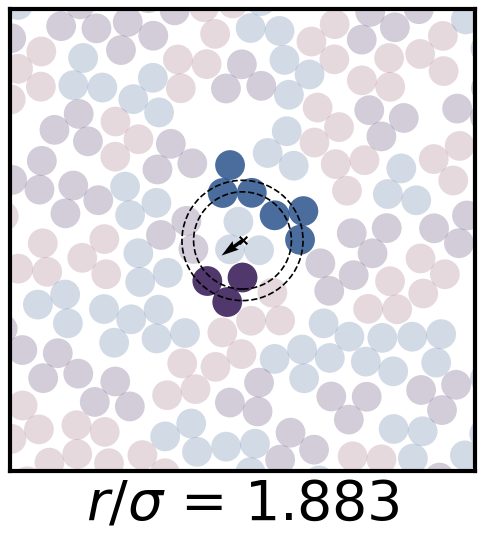

Molecule number 30
[ 99 134]


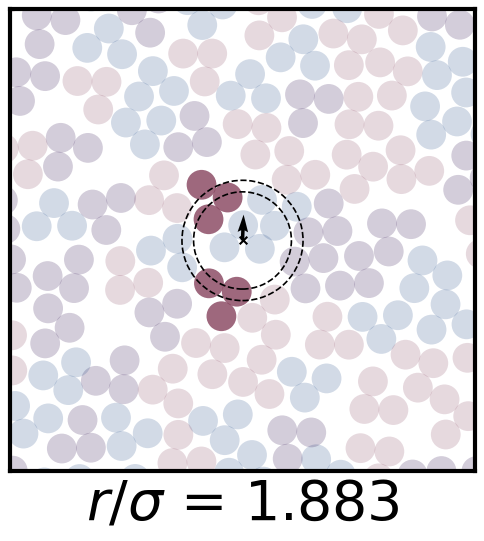

Molecule number 136
[102 116 133 172 174 243]


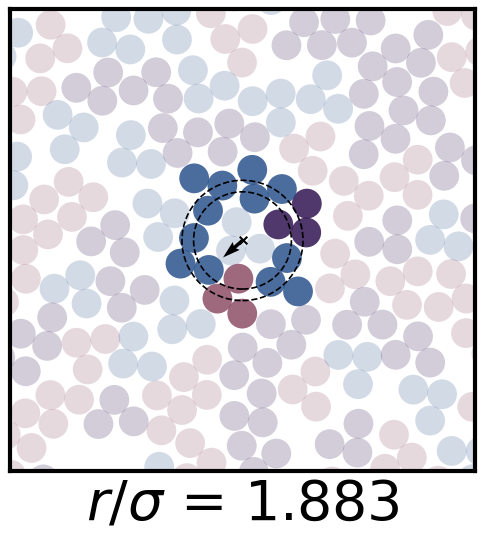

Molecule number 240
[ 24 144 187]


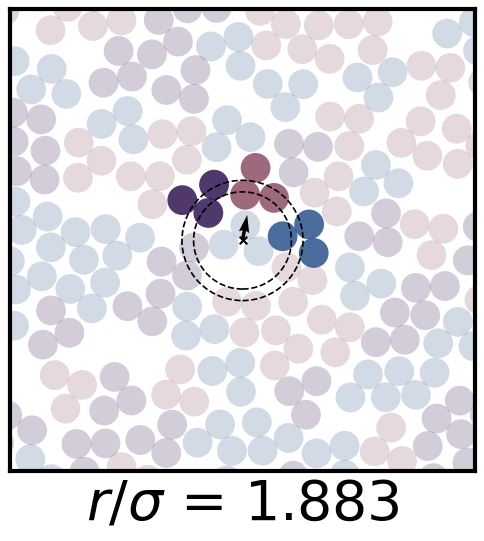

Molecule number 258
[ 48 258]


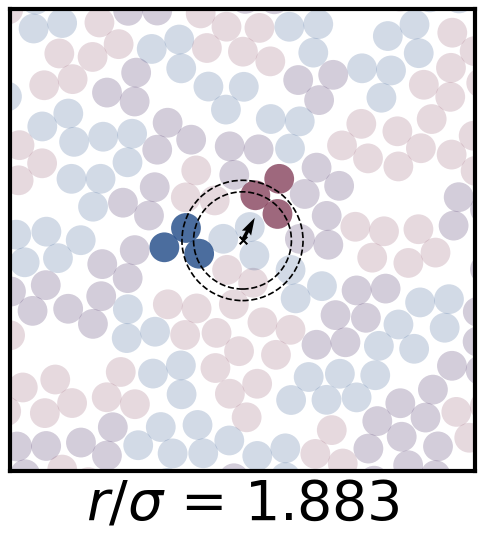

Molecule number 187
[ 29 133 208 240]


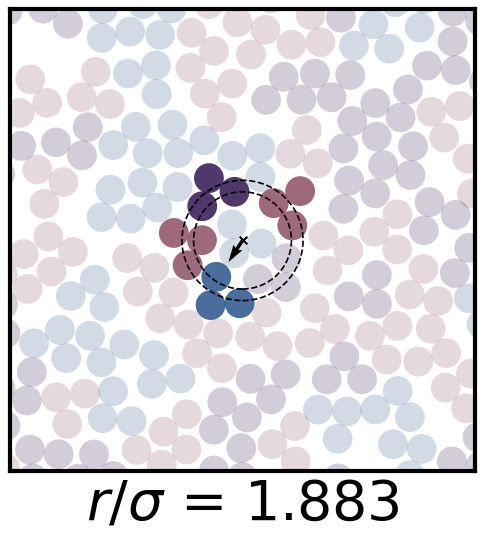

Molecule number 243


In [372]:
####################### Choose Parameters for below plot
t = 1 # timesteps
peak = 0
peaks = popt_list
molnum = 258#center circles on this molecule
#######################

# radial_peaks(t, peak, peaks, molnum)
radial_peaks(t, peak, peaks, 30)
radial_peaks(t, peak, peaks, 136)
radial_peaks(t, peak, peaks, 240)
radial_peaks(t, peak, peaks, 258)
radial_peaks(t, peak, peaks,187)
radial_peaks(t, peak, peaks, 243)






In [311]:
def radial_orientation(peak, t):
    # peak_dist = peaks[peak][1]
    # peak_SD = peaks[peak][2]
    peak_dist = peak ### manual 
    peak_SD = 0.2
    if peak_SD > 0.5:
        peak_SD = 0.2
    count = 0
    angles = []
    for n in range(N):
        xcenter = x_COM[t,n]
        ycenter = y_COM[t,n]

        dx = periodic(x_COM[t,:] - xcenter)
        dy = periodic(y_COM[t,:] - ycenter)
        r2 = dx**2 + dy**2
        mask = (r2 >= (peak_dist - 1*peak_SD)**2) & (r2 <= (peak_dist + 1*peak_SD)**2)
        in_annulus = np.where(mask)[0]
        count += in_annulus.size
        ang = np.arctan2(omega_y[t, in_annulus], omega_x[t, in_annulus]) - np.arctan2(omega_y[t,n], omega_x[t,n])
        ang = ang % (2 * np.pi)
        angles.append(ang)

    return angles

In [374]:
####
peaknum = 1.7
tmin = 5000
tmax = 10000
####

angles = np.concatenate([np.concatenate(radial_orientation(peaknum, t)) for t in range(tmin, tmax)])

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_64792/2877791361.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta \\theta$", fontsize = 20)


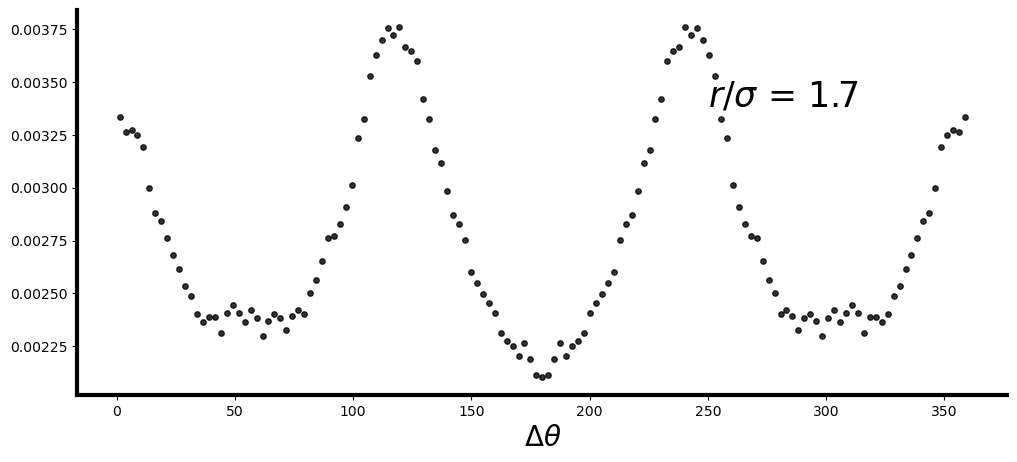

In [378]:


angles =  np.array(angles)
bins = np.linspace(0, 2*np.pi, 144) 
hist, bin_edges = np.histogram(angles, bins=bins, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

hist_deg = hist * (np.pi/180)

plt.figure(figsize = (12, 5))
plt.scatter(np.degrees(bin_centers),hist_deg,  marker = 'o', color = 'black', alpha = 0.8, s = 15)
plt.xlabel("$\Delta \\theta$", fontsize = 20)
plt.text(250, np.max(hist_deg)*0.9, f"$r/\\sigma$ = {peaknum}", fontsize = 25)
ax = plt.gca()
# {peaks[peaknum][1]:.2f}

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

In [121]:
# Distances 
dists = np.arange(0, 7.5, 0.05)

In [1039]:
r1 = radial_orientation(135000, 150000)
r2 = radial_orientation(115000, 130000)
r3 = radial_orientation(95000, 110000)
r4 = radial_orientation(75000, 90000)
r5 = radial_orientation(55000, 70000)

In [1025]:
# r1 *= np.pi
# r2 *= np.pi
# r3 *= np.pi
# r4 *= np.pi
# r5 *= np.pi

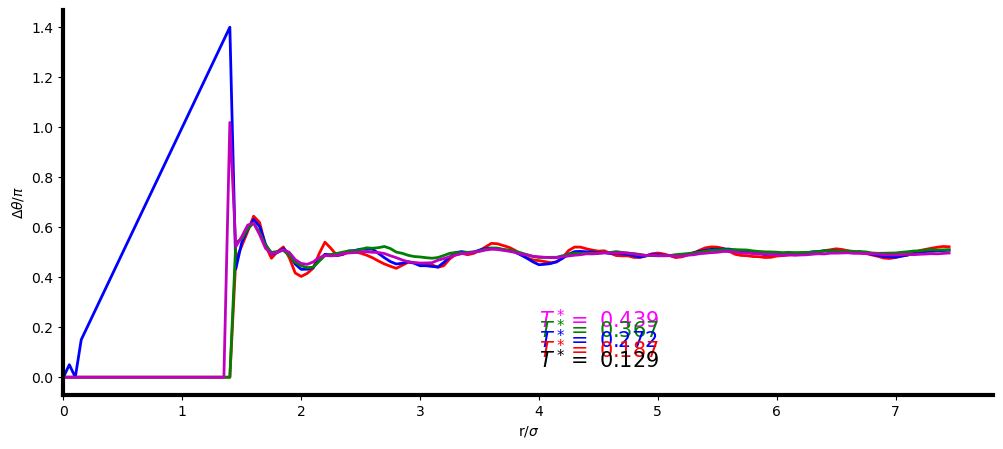

In [1044]:
plt.figure(figsize = (12, 5))
# plt.plot(dists, r1, lw = 2, color = 'k')
plt.plot(dists, r2, lw = 2, color = 'r')
plt.plot(dists, r3, lw = 2, color = 'b')
plt.plot(dists, r4, lw = 2, color = 'g')
plt.plot(dists, r5, lw = 2, color = 'm')
plt.xlim(0,)
# plt.ylim(0, np.pi)

plt.text(4, 0.2, f"$T^* = $ {np.mean(T[55000:70000]):.3f}", color = 'magenta', fontsize = 15)
plt.text(4, 0.16, f"$T^* = $ {np.mean(T[75000:90000]):.3f}", color = 'green', fontsize = 15)
plt.text(4, 0.12, f"$T^* = $ {np.mean(T[95000:110000]):.3f}", color = 'blue', fontsize = 15)
plt.text(4, 0.08, f"$T^* = $ {np.mean(T[115000:130000]):.3f}", color = 'red', fontsize = 15)
plt.text(4, 0.04, f"$T^* = $ {np.mean(T[135000:150000]):.3f}", color = 'black', fontsize = 15)



ax = plt.gca()
plt.xlabel("r/$\\sigma$")
plt.ylabel("$\\Delta \\theta / \\pi$")
plt.xlim(0,)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)
plt.show()

In [221]:
g_r_l = [
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 15000, 30000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 35000, 50000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 55000, 70000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 75000, 90000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 95000, 110000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 115000, 130000)[1],
    compute_gr(gr_x, gr_y, dr, hk_lim, rho_star, 135000, 150000)[1]
]
g_r_l = np.array(g_r_l)


In [288]:
## Choose cutoff for processing g_r
cutoff =17.3
trunc = (int)(cutoff/0.05)
g_r_list = g_r_l[:, 0:trunc]

In [238]:
## Temperature list
temp_list = [
    np.mean(T[15000:30000]),
    np.mean(T[35000:50000]),
    np.mean(T[55000:70000]),
    np.mean(T[75000:90000]),
    np.mean(T[95000:110000]),
    np.mean(T[115000:130000]),
    np.mean(T[135000:150000]),
]


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_64792/4129755308.py:18: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize = 14)


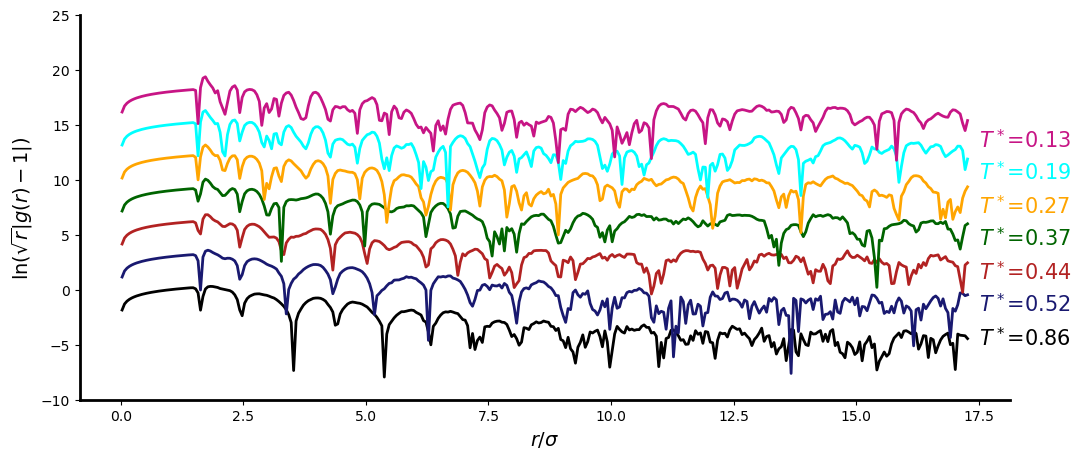

In [289]:
##### Correlation Lengths 

def correlation_length(gr, g_asymptotic, r):
    h_r =  gr - g_asymptotic
    return np.log(np.sqrt(r[0:trunc])* np.abs(h_r))

plt.figure(figsize = (12,5))
i =0
c = ['k', 'midnightblue', 'firebrick', 'darkgreen', 'orange', 'cyan', 'mediumvioletred', 'darkviolet']
for g in g_r_list:
    g_corr = correlation_length(g, 1, r_vals[0:trunc])
    plt.plot(r_vals[0:trunc], g_corr + i*3, color = c[i], lw = 2)
    plt.text(trunc*0.05+0.2,-5+ i*3 , "$T^*$="+f"{temp_list[i]:.2f}", fontsize = 15, color = c[i])
    i+=1
    
# plt.xlim(0, 7.5)
plt.xlabel("$r/\\sigma$", fontsize = 14)
plt.ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize = 14)
ax = plt.gca()
plt.ylim(-10, 25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(2)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_64792/1552234906.py:19: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize = 14)


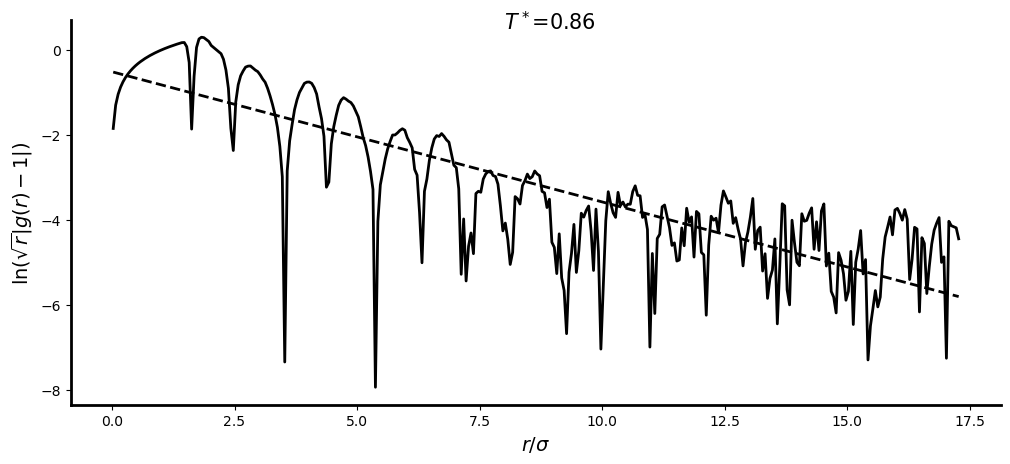

<Figure size 1200x500 with 0 Axes>

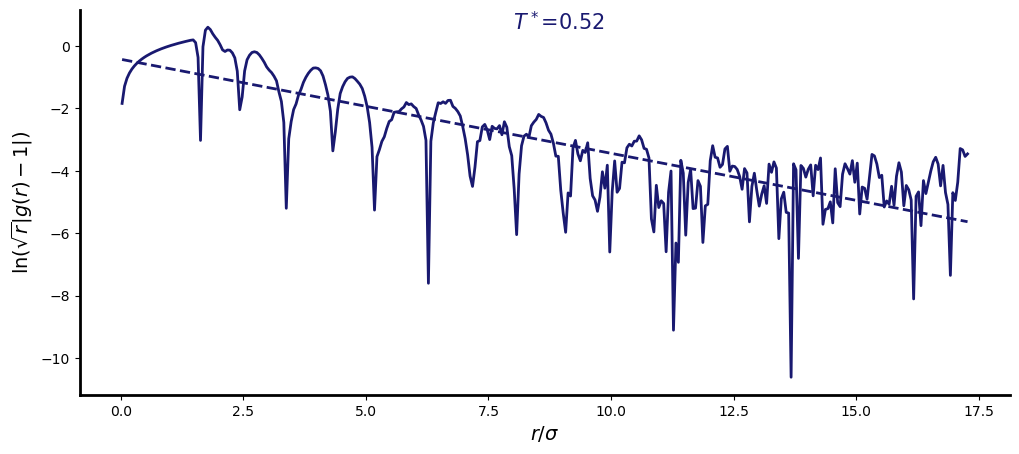

<Figure size 1200x500 with 0 Axes>

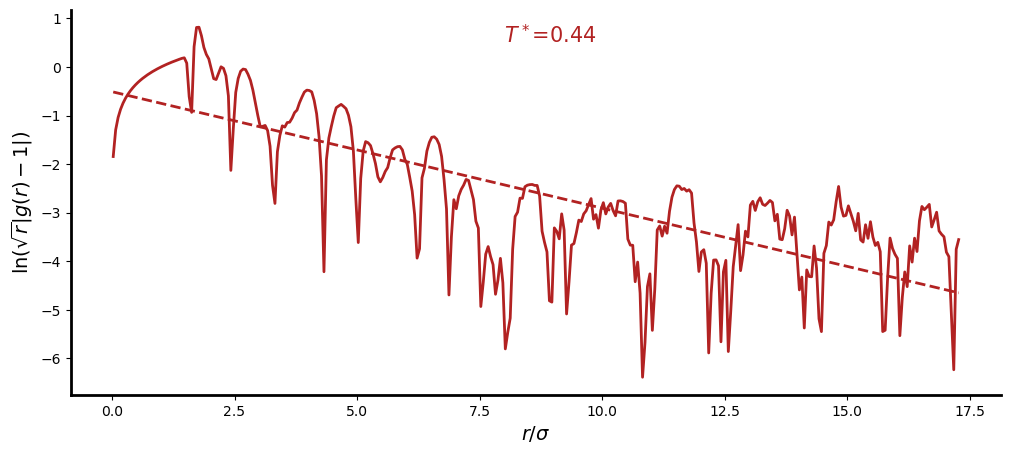

<Figure size 1200x500 with 0 Axes>

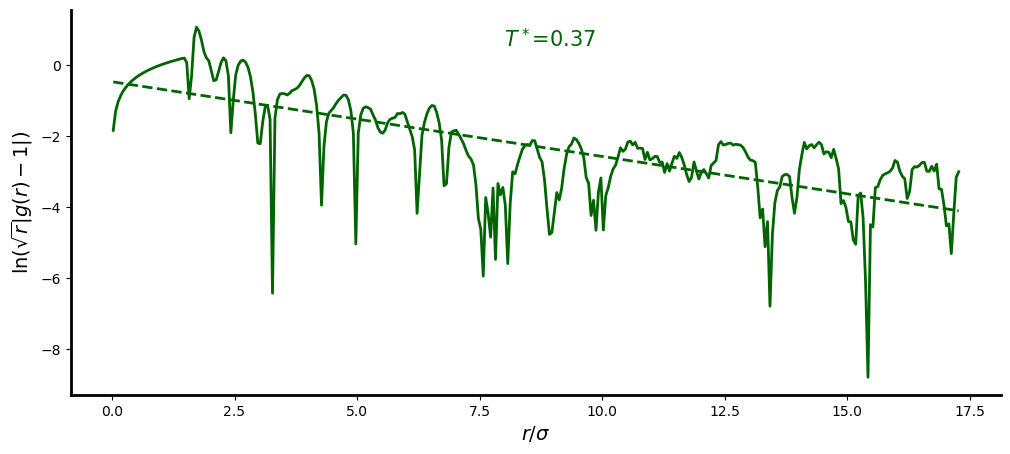

<Figure size 1200x500 with 0 Axes>

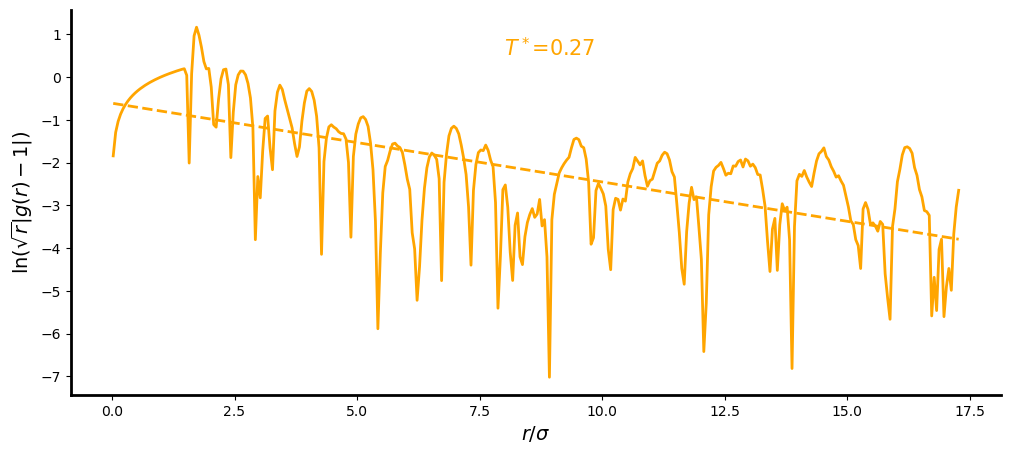

<Figure size 1200x500 with 0 Axes>

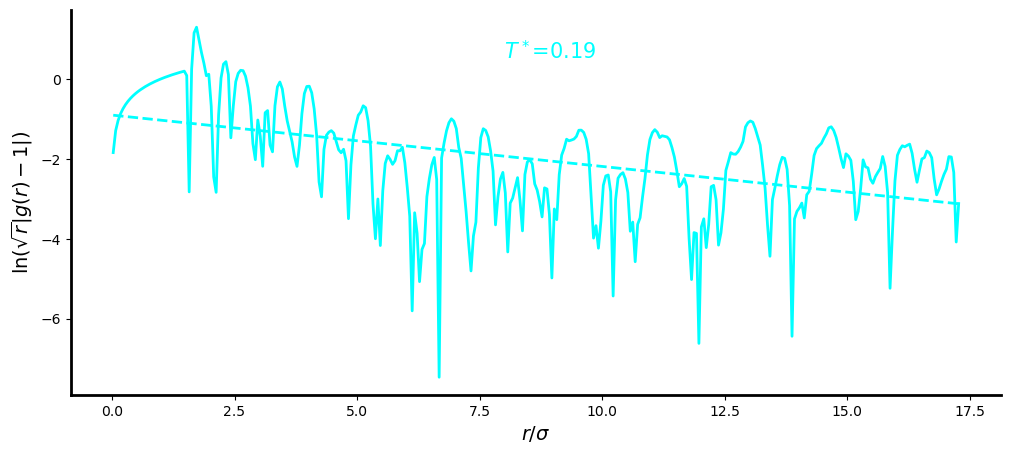

<Figure size 1200x500 with 0 Axes>

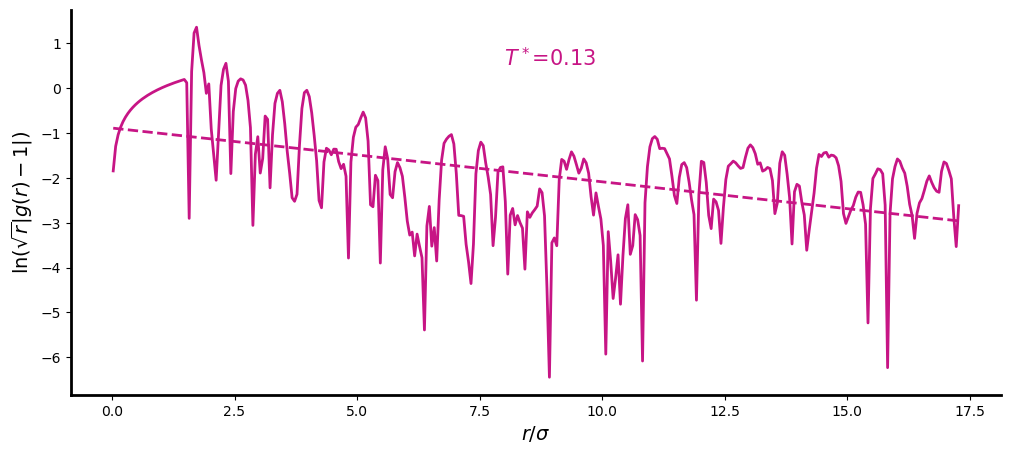

<Figure size 1200x500 with 0 Axes>

Slope:  -0.307  Intercept:  -0.509 Correlation length = 3.263

Slope:  -0.301  Intercept:  -0.432 Correlation length = 3.323

Slope:  -0.240  Intercept:  -0.509 Correlation length = 4.169

Slope:  -0.210  Intercept:  -0.475 Correlation length = 4.761

Slope:  -0.184  Intercept:  -0.614 Correlation length = 5.435

Slope:  -0.129  Intercept:  -0.906 Correlation length = 7.781

Slope:  -0.120  Intercept:  -0.889 Correlation length = 8.346



In [290]:
##### Correlation Lengths 

i =0
fitparams = []
c = ['k', 'midnightblue', 'firebrick', 'darkgreen', 'orange', 'cyan', 'mediumvioletred', 'darkviolet']
for g in g_r_list:
    plt.figure(figsize = (12,5))
    g_corr = correlation_length(g, 1, r_vals[0:trunc])
    plt.plot(r_vals[0:trunc], g_corr, color = c[i], lw = 2)

    #fit
    slope, intercept = np.polyfit(r_vals[0:trunc], g_corr, 1)
    plt.plot(r_vals[0:trunc],r_vals[0:trunc] * slope + intercept, lw = 2,linestyle= '--', color = c[i])
    fitparams.append((slope,intercept))

    plt.text(8,0.5 , "$T^*$="+f"{temp_list[i]:.2f}", fontsize = 15, color = c[i])
    i+=1
    plt.xlabel("$r/\\sigma$", fontsize = 14)
    plt.ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize = 14)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    plt.figure(figsize = (12,5))
    # plt.xlim(0, 7.5)
    plt.show()

for params in fitparams: 
    print("Slope: ", f"{params[0]:.3f}", " Intercept: " , f"{params[1]:.3f}", f"Correlation length = " + f"{-1/params[0]:.3f}" "\n")

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4x/bmt6t_kn6kj7kj6_jg6724p00000gn/T/ipykernel_64792/1660615243.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize=12)


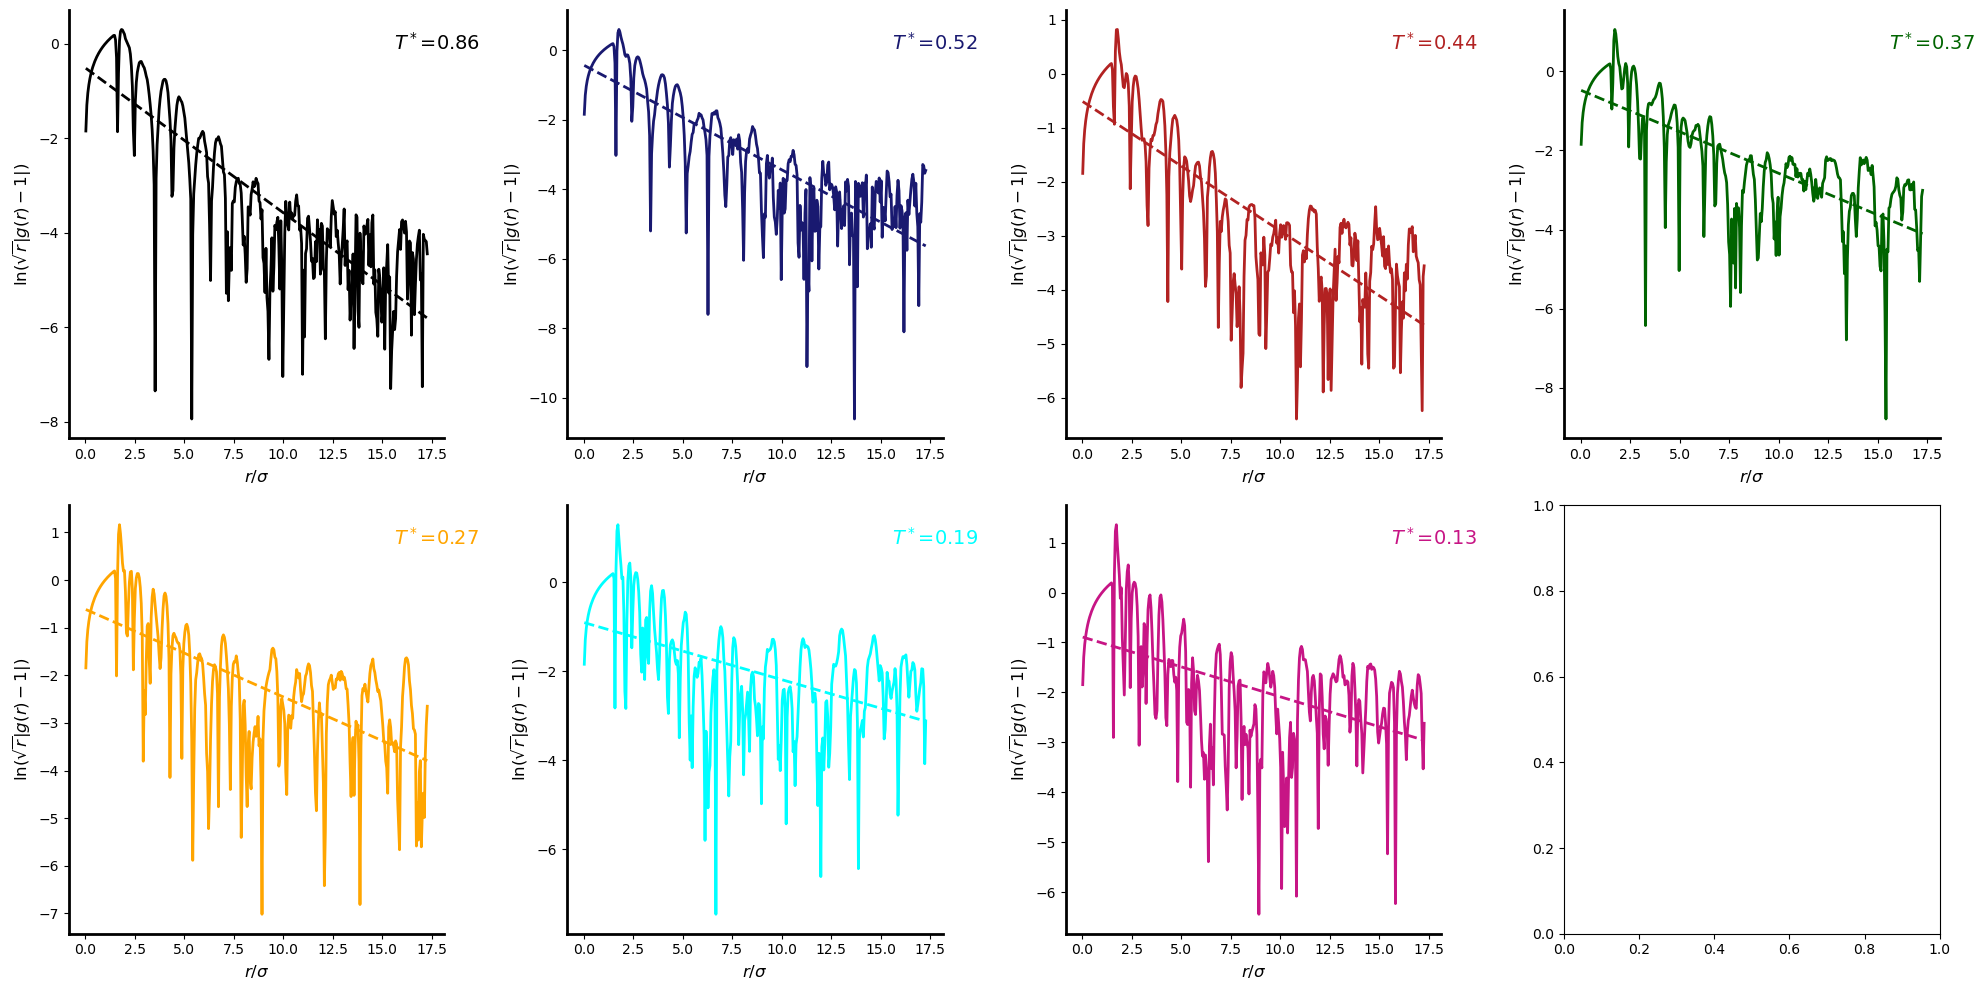

Temp: 0.856, Slope: -0.307  Intercept: -0.509   Correlation length: 3.263
Temp: 0.524, Slope: -0.301  Intercept: -0.432   Correlation length: 3.323
Temp: 0.439, Slope: -0.240  Intercept: -0.509   Correlation length: 4.169
Temp: 0.367, Slope: -0.210  Intercept: -0.475   Correlation length: 4.761
Temp: 0.272, Slope: -0.184  Intercept: -0.614   Correlation length: 5.435
Temp: 0.187, Slope: -0.129  Intercept: -0.906   Correlation length: 7.781
Temp: 0.129, Slope: -0.120  Intercept: -0.889   Correlation length: 8.346


In [303]:
### Correlation Lengths - subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Adjust depending on how many temperatures you're plotting
axs = axs.flatten()

fitparams = []
c = ['k', 'midnightblue', 'firebrick', 'darkgreen', 'orange', 'cyan', 'mediumvioletred', 'darkviolet']

for i, g in enumerate(g_r_list):
    ax = axs[i]
    g_corr = correlation_length(g, 1, r_vals[0:trunc])

    ax.plot(r_vals[0:trunc], g_corr, color=c[i], lw=2)

    slope, intercept = np.polyfit(r_vals[0:trunc], g_corr, 1)
    ax.plot(r_vals[0:trunc], slope * r_vals[0:trunc] + intercept, linestyle='--', color=c[i], lw=2)

    fitparams.append((slope, intercept))

    ax.text(cutoff*0.05, 0.95, "$T^*$=" + f"{temp_list[i]:.2f}", transform=ax.transAxes,
            fontsize=14, color=c[i], verticalalignment='top')

    ax.set_xlabel("$r/\\sigma$", fontsize=12)
    ax.set_ylabel("$\\ln(\sqrt{r}|g(r)-1|)$", fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    # ax.set_xlim(0, 7.5)


plt.tight_layout()
plt.show()

i =0
for params in fitparams:
    slope, intercept = params
    corr_length = -1/slope if slope != 0 else np.inf
    print(f"Temp: {temp_list[i]:.3f}, "f"Slope: {slope:.3f}  Intercept: {intercept:.3f}   Correlation length: {corr_length:.3f}")
    i+=1


# Order Parameter

In [69]:
## Unit orientation vector
omega__x = np.array(periodic(x[:,0:N]- x_COM ))
omega__y = np.array(periodic(y[:,0:N]- y_COM))
omega_magnitude = np.sqrt(omega__x**2 + omega__y**2)
omega_x = omega__x/omega_magnitude
omega_y = omega__y/omega_magnitude

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


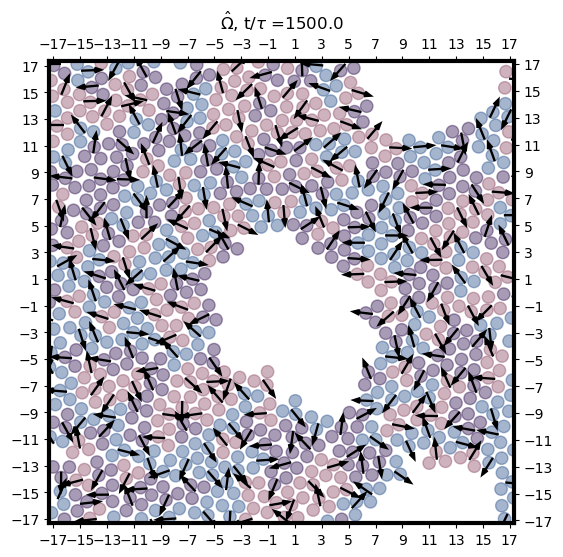

In [580]:

### Visualize one state

t = 150000  


def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(t) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])


L  =(np.sqrt(N/(rho_star)))
plt.figure(figsize = (6,6))

colors = ['#1E4886', '#240547', '#86425D']

# colors = ['#001476', '#760072', '#40699E', '#16034D']   '#006276'

alph = 0.4
ss = 80

### ss = 285 for N = 200

indices = [colors[i%3] for i in range(N)]
plt.scatter(x0, y0, color = indices, s = ss, alpha = alph)
plt.scatter(x00, y00, color = indices, s = ss, alpha = alph)
plt.scatter(x000, y000, color = indices, s = ss, alpha = alph)


plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


x0 = x_COM[t,:]
y0 = y_COM[t,:]
u = omega_x[t,:]
v = omega_y[t,:]
plt.quiver(x0, y0, u, v, scale=20, width=0.005, headwidth=3, headlength=4)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)

plt.gca().set_aspect('equal')

plt.title("$\\hat{\\Omega}$, t/$\\tau$ ="+ f"{t*0.01}")
plt.show()


In [312]:
def get_s_m(m):
    theta_j = np.arctan2(omega_y[1:, :], omega_x[1:, :])
    s_m = np.abs(np.sum(np.exp(1j * m * theta_j), axis=1) / N)
    return s_m

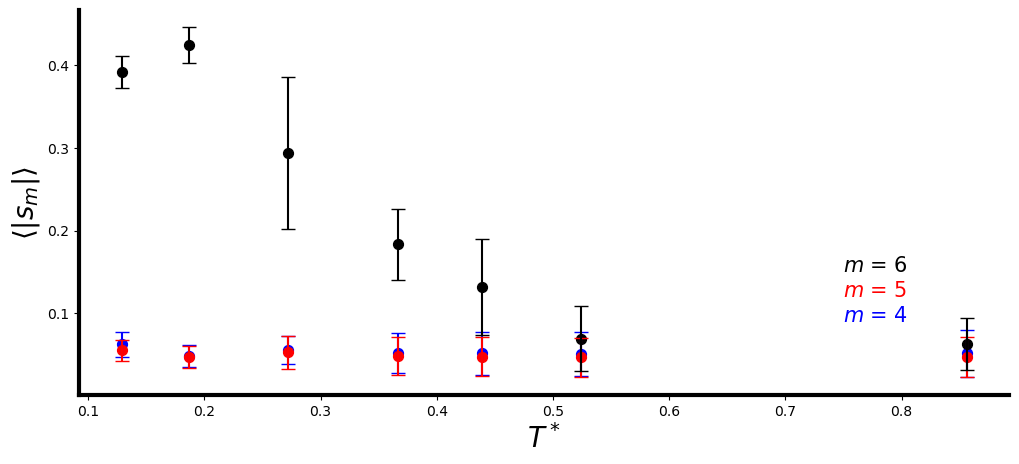

In [ ]:
################
start = np.array([15000, 35000, 55000, 75000, 95000, 115000, 135000])
end = np.array([30000, 50000, 70000, 90000, 110000, 130000, 150000])
################

def order_temp(start, end, s_m):
    s_mmean  = np.mean(s_m[start-1:end])
    temp_mean = np.mean(T[start-1:end])
    return (s_mmean, temp_mean)

def mean_s_m(m):
    s_m = get_s_m(m)
    s_mean = []
    temp_mean = []
    s_mean = [order_temp(start[i], end[i], s_m)[0] for i in range(start.size)]
    temp_mean = [order_temp(start[i], end[i], s_m)[1] for i in range(start.size)]
    s_m_var = np.array([np.sum((s_m[start[i]:end[i]] - s_mean[i])**2)/(end[i]-start[i]-1) for i in range(start.size)])
    s_m_SD = np.array(s_m_var**0.5)
    return s_mean, temp_mean, s_m_SD

s6, t6, SD6 = mean_s_m(6)
s5, t5, SD5 = mean_s_m(5)
s4, t4, SD4 = mean_s_m(4)
s3, t3, SD3 = mean_s_m(3)



plt.figure(figsize = (12,5))



plt.scatter(t4, s4, color = 'b', s = 50)
plt.errorbar(t4, s4, yerr=SD4, fmt='none', capsize=5, elinewidth=1.5, color = 'b')

plt.scatter(t5, s5, color = 'r', s = 50)
plt.errorbar(t5, s5, yerr=SD5, fmt='none', capsize=5, elinewidth=1.5, color = 'r')

plt.scatter(t6, s6, color = 'k', s = 50)
plt.errorbar(t6, s6, yerr=SD6, fmt='none', capsize=5, elinewidth=1.5, color = 'k')

# plt.scatter(t3, s3, color = 'g', s = 50)
# plt.errorbar(t3, s3, yerr=SD3, fmt='none', capsize=5, elinewidth=1.5, color = 'g')

plt.xlabel('$T^*$', fontsize = 20)
plt.ylabel('$\\langle |s_m| \\rangle$', fontsize = 20)
plt.text(0.75, 0.15, "$m$ = 6", color= 'k', fontsize = 15)
plt.text(0.75, 0.12, "$m$ = 5", color= 'r', fontsize = 15)
plt.text(0.75, 0.09, "$m$ = 4", color= 'b', fontsize = 15)

ax = plt.gca()
# plt.xlim(0.25, 0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for spine in ax.spines.values():
    spine.set_linewidth(3)

plt.show()


In [70]:
## Compute n^

theta_j = np.arctan2(omega_y[0:, :], omega_x[0:, :])
def n_hat(m):
    Q_1 = np.sum(np.cos(np.abs(theta_j*m)), axis = 1)/N
    Q_2 = np.sum(np.sin(np.abs(theta_j*m)), axis = 1)/N
    theta0 = np.arctan2(Q_1, Q_2)
    return np.cos(m/2*theta0), np.sin(m/2*theta0)


In [124]:
n_6 = n_hat(6)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


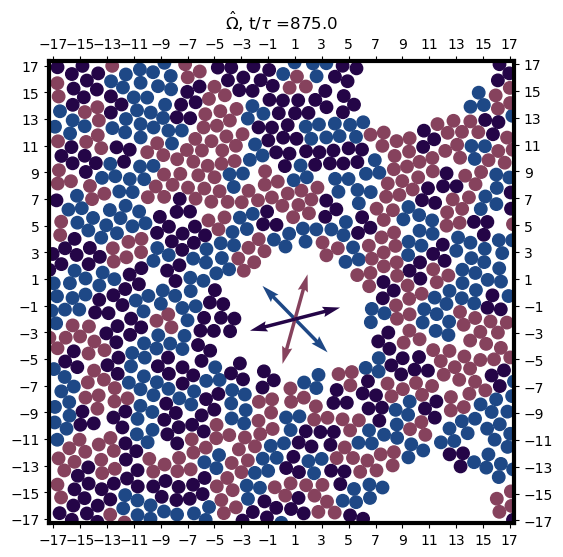

In [310]:
##############################################
## Set arrows position (in void)
arrows_x = 1
arrows_y = -2
alph = 1
ss = 80
t = 87500
##############################################

def get_state(t):
    return x[t, :], y[t, :],  vx[t, :], vy[t,:]

# get state at some time 
xt, yt, vxt, vyt = get_state(t) ### CHOOSE STATE


x0 = np.array(xt[0:N])
x00 = np.array(xt[N:2*N])
x000 = np.array(xt[2*N:3*N])
y0 = np.array(yt[0:N])
y00 = np.array(yt[N:2*N])
y000 = np.array(yt[2*N:3*N])
vx0 = np.array(vxt[0:N])
vx00 = np.array(vxt[N:2*N])
vx000 = np.array(vxt[2*N:3*N])
vy0 = np.array(vyt[0:N])
vy00 = np.array(vyt[N:2*N])
vy000 = np.array(vyt[2*N:3*N])

plt.figure(figsize = (6,6))

# colors = ['#4E3629', '#FFC72C', '#C00404'] # Brown U Colors !
# colors = ['#002147', '#E08D79', '#426A5A']  # oxford colors
colors = ['#1E4886', '#240547', '#86425D']


### ss = 285 for N = 200
indices = assign_orientation_colors(n_6[0][t], n_6[1][t], omega_x[t,:], omega_y[t,:]) 
cols = [colors[indices[i]] for i in range(N)]
plt.scatter(x0, y0, color = cols, s = ss, alpha = alph)
plt.scatter(x00, y00, color = cols, s = ss, alpha = alph)
plt.scatter(x000, y000, color = cols, s = ss, alpha = alph)



plt.xlim(-L/2,L/2)
plt.ylim(-L/2,L/2)


plt.xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
plt.yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(3)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))
ax_right = ax.twinx()
ax_right.set_ylim(ax.get_ylim())
ax_right.set_yticks(np.arange(np.ceil(-L/2), np.floor(L/2)+1, 2))


x0 = x_COM[t,:]
y0 = y_COM[t,:]
u = omega_x[t,:]
v = omega_y[t,:]
# plt.quiver(x0, y0, u, v, scale=20, width=0.005, headwidth=3, headlength=4)

plt.quiver(arrows_x,arrows_y,n_6[0][t], n_6[1][t], scale = 10, color = colors[0])
plt.quiver(arrows_x,arrows_y,-n_6[0][t], -n_6[1][t], scale = 10, color = colors[0])
plt.quiver(arrows_x,arrows_y,n_6[0][t]*np.cos(np.pi/3) + n_6[1][t]*np.sin(np.pi/3), -n_6[0][t]*np.sin(np.pi/3) + n_6[1][t]*np.cos(np.pi/3), scale = 10, color = colors[2])
plt.quiver(arrows_x,arrows_y,-(n_6[0][t]*np.cos(np.pi/3) + n_6[1][t]*np.sin(np.pi/3)), -(-n_6[0][t]*np.sin(np.pi/3) + n_6[1][t]*np.cos(np.pi/3)), scale = 10, color = colors[2])
plt.quiver(arrows_x,arrows_y,n_6[0][t]*np.cos(2*np.pi/3) + n_6[1][t]*np.sin(2*np.pi/3), -n_6[0][t]*np.sin(2*np.pi/3) + n_6[1][t]*np.cos(2*np.pi/3), scale = 10, color = colors[1])
plt.quiver(arrows_x,arrows_y,-(n_6[0][t]*np.cos(2*np.pi/3) + n_6[1][t]*np.sin(2*np.pi/3)), -(-n_6[0][t]*np.sin(2*np.pi/3) + n_6[1][t]*np.cos(2*np.pi/3)), scale = 10, color = colors[1])

# plt.text(-3.8,9.5, "$\\hat{n}$", color = 'red', fontsize = 20)
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)

ax = plt.gca().set_aspect('equal')

plt.title("$\\hat{\\Omega}$, t/$\\tau$ =" + f"{t*0.01}")
plt.show()


In [912]:
# Count nearest neighbors; recompute order parameter without molecules in voids


145000

# Time Correlation Functions

In [50]:
## Function for conventional time-correlation function

def time_autocorrelation(A, tau_max):
    N = A.size
    C = np.zeros(tau_max)

    for tau in range(tau_max):
        total = 0.0
        count = 0
        for t0 in range(N - tau):
            total += A[t0] * A[t0 + tau]
            count += 1
        C[tau] = total / count

    C /= C[0]
    return C



In [51]:
PE_t_corr = time_autocorrelation(PE, (int)(10000/0.001/10/10))

In [29]:
from scipy.fft import fft, ifft

def time_correlation_fft(A):
    N = A.size
    A_padded = np.append(A, np.zeros(N))
    Ahat = fft(A_padded)
    square_modulus = Ahat * np.conj(Ahat)
    t_corr = ifft(square_modulus).real

    t_corr = t_corr[:N] ## first N points
    t_corr /= (N - np.arange(N))

    return t_corr/t_corr[0]

In [62]:
np.mean(PE**2) - np.mean(PE)**2

np.float64(140.99609458576757)

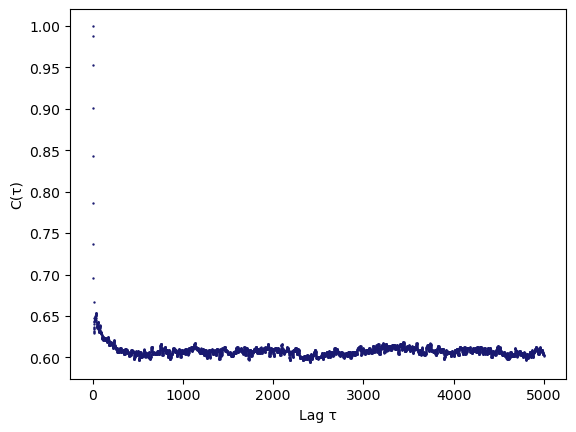

In [61]:
# Subtract mean
PE = PE - PE[0]

# Set reasonable max lag
tau_max = int((PE.size) * 0.05)  # 5% of total time length

# Use FFT method for speed and correctness
PE_t_corr = time_correlation_fft(PE)

# Plot a meaningful range
plt.scatter(np.arange(tau_max), PE_t_corr[:tau_max], s = 0.5, color = 'midnightblue')
plt.xlabel('t/τ')
plt.ylabel('C(τ)')
plt.show()


In [32]:
PE_fft_corr = time_correlation_fft(PE)

In [72]:
theta_j[0].shape

(300,)

In [78]:
def orientational_corr(m, tau_max):
    A = theta_j  # shape = (time, N)
    C = np.zeros(tau_max)

    total_time = A.shape[0]  # number of time points
    for tau in range(tau_max):
        total = 0.0
        count = 0
        for t0 in range(total_time - tau):
            delta = A[t0 + tau] - A[t0]  # (N,)
            total += np.mean(np.cos(m * delta))
            count += 1
        C[tau] = total / count

    return C / C[0]


In [79]:
orientational_corr(6, (int)(10000/0.001/10/10))